# 4장 예측 함수 정의하기

* "부록3 매트플롯립 입문"에서 한글 폰트를 올바르게 출력하기 위한 설치 방법을 설명했다. 설치 방법은 다음과 같다.


In [ ]:
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 4.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such 

In [ ]:
# 필요 라이브러리 설치

!pip install torchviz | tail -n 1

* 모든 설치가 끝나면 한글 폰트를 바르게 출력하기 위해 **[런타임]** -> **[런타임 다시시작]**을 클릭한 다음, 아래 셀부터 코드를 실행해 주십시오.

In [ ]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

In [ ]:
# 파이토치 관련 라이브러리
import torch
import torch.nn as nn
from torchviz import make_dot

In [ ]:
# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

## 4.4 예측 함수의 내부 구조

In [ ]:
# 레이어 함수 정의

# 첫번째 선형 함수
# 784 입력 수
# 128 출력 수
l1 = nn.Linear(784, 128)

# 두번째 선형 함수
# 128 입력 수
# 10 출력 수
l2 = nn.Linear(128, 10)

# 활성화 함수
relu = nn.ReLU(inplace=True)

In [ ]:
# 입력 텐서로부터 출력 텐서를 계산

# 더미 입력 데이터 작성
inputs = torch.randn(100, 784)

# 중간 텐서 1 계산
m1 = l1(inputs)

# 중간 텐서 2 계산
m2 = relu(m1)

# 출력 텐서 계산
outputs = l2(m2)

# 입력 텐서와 출력 텐서 shape 확인
print('입력 텐서', inputs.shape)
print('출력 텐서', outputs.shape)

입력 텐서 torch.Size([100, 784])
출력 텐서 torch.Size([100, 10])


In [ ]:
# nn.Sequential을 사용해 전체를 합성 함수로 정의

net2 = nn.Sequential(
    l1,
    relu,
    l2
)

outputs2 = net2(inputs)

# 입력 텐서와 출력 텐서의 shape 확인
print('입력 텐서', inputs.shape)
print('출력 텐서', outputs2.shape)

입력 텐서 torch.Size([100, 784])
출력 텐서 torch.Size([100, 10])


## 4.7 활성화 함수의 목적
이 절에서는 예측 결과 그래프(그림 4-9에서 그림 4-11까지)가 중요하며, 따라서 지금 시점에서 구현 코드의 의미를 이해하지 못하더라도 상관없다. 아래의 코드는 어디까지나 참고를 위해 작성되었다.

#### 학습용 데이터 계산

In [ ]:
# 훈련 데이터, 검증 데이터 계산
np.random.seed(123)
x = np.random.randn(100,1)

# y는 x^2에 난수를 1/10만큼 더한 값
y = x**2 + np.random.randn(100,1) * 0.1

# 데이터를 50건씩 훈련용과 검증용으로 나눔
x_train = x[:50,:]
x_test = x[50:,:]
y_train = y[:50,:]
y_test = y[50:,:]

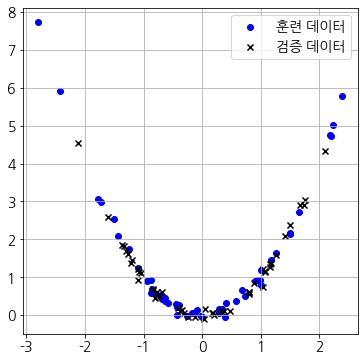

In [ ]:
# 산포도 출력
plt.scatter(x_train, y_train, c='b', label='훈련 데이터')
plt.scatter(x_test, y_test, c='k', marker='x', label='검증 데이터')
plt.legend()
plt.show()

In [ ]:
# 입력 변수 x와 정답 yt의 텐서화

inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).float()

inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).float()

In [ ]:
import torch.optim as optim

### 선형 회귀 모델의 경우

In [ ]:
# 모델 정의

class Net(nn.Module):
    def __init__(self):
        #  부모 클래스 nn.Modules 의 초기화
        super().__init__()

        # 출력층 정의
        self.l1 = nn.Linear(1, 1)   
        
    # 예측 함수 정의
    def forward(self, x):
        x1 = self.l1(x) # 선형 회귀
        return x1

In [ ]:
# 학습률
lr = 0.01

# 인스턴스 생성(파라미터 초기화)
net = Net()

# 최적화 알고리즘 : 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 손실 함수： 평균 제곱 오차
criterion = nn.MSELoss()

# 반복 횟수
num_epochs = 10000

#  history 기록을 위한 배열 초기화(손실 함수 값 만을 기록)
history = np.zeros((0,2))

In [ ]:
# 반복 계산 메인 루프

for epoch in range(num_epochs):
    
    # 경사 값 초기화
    optimizer.zero_grad()

    # 예측 계산
    outputs = net(inputs)
  
    # 오차 계산
    loss = criterion(outputs, labels)

    # 경사 계산
    loss.backward()

    # 경사 하강법 적용
    optimizer.step()

    # 100회 마다 도중 경과를 기록
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 8.66342
Epoch 100 loss: 3.30497
Epoch 200 loss: 3.21700
Epoch 300 loss: 3.21547
Epoch 400 loss: 3.21544
Epoch 500 loss: 3.21544
Epoch 600 loss: 3.21544
Epoch 700 loss: 3.21544
Epoch 800 loss: 3.21544
Epoch 900 loss: 3.21544
Epoch 1000 loss: 3.21544
Epoch 1100 loss: 3.21544
Epoch 1200 loss: 3.21544
Epoch 1300 loss: 3.21544
Epoch 1400 loss: 3.21544
Epoch 1500 loss: 3.21544
Epoch 1600 loss: 3.21544
Epoch 1700 loss: 3.21544
Epoch 1800 loss: 3.21544
Epoch 1900 loss: 3.21544
Epoch 2000 loss: 3.21544
Epoch 2100 loss: 3.21544
Epoch 2200 loss: 3.21544
Epoch 2300 loss: 3.21544
Epoch 2400 loss: 3.21544
Epoch 2500 loss: 3.21544
Epoch 2600 loss: 3.21544
Epoch 2700 loss: 3.21544
Epoch 2800 loss: 3.21544
Epoch 2900 loss: 3.21544
Epoch 3000 loss: 3.21544
Epoch 3100 loss: 3.21544
Epoch 3200 loss: 3.21544
Epoch 3300 loss: 3.21544
Epoch 3400 loss: 3.21544
Epoch 3500 loss: 3.21544
Epoch 3600 loss: 3.21544
Epoch 3700 loss: 3.21544
Epoch 3800 loss: 3.21544
Epoch 3900 loss: 3.21544
Epoch 4000 l

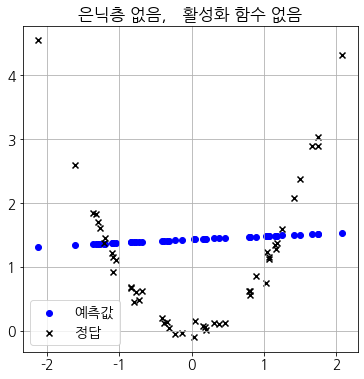

In [ ]:
# 결과 그래프
labels_pred = net(inputs_test)

plt.title('은닉층 없음,　활성화 함수 없음')
plt.scatter(inputs_test[:,0].data, labels_pred[:,0].data, c='b', label='예측값')
plt.scatter(inputs_test[:,0].data, labels_test[:,0].data, c='k', marker='x',label='정답')
plt.legend()
plt.show()

### 유사 딥러닝 모델의 경우

In [ ]:
# 모델 정의

class Net2(nn.Module):
    def __init__(self):
        #  부모 클래스 nn.Modules 초기화
        super().__init__()

        # 출력층 정의
        self.l1 = nn.Linear(1, 10)
        self.l2 = nn.Linear(10, 10)
        self.l3 = nn.Linear(10,1)
        
    # 예측 함수 정의
    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.l2(x1)
        x3 = self.l3(x2)
        return x3

In [ ]:
# 학습률
lr = 0.01

# 인스턴스 생성(파라미터 초기화)
net2 = Net2()

# 최적화 알고리즘 : 경사 하강법
optimizer = optim.SGD(net2.parameters(), lr=lr)

# 손실 함수 : 평균 제곱 오차
criterion = nn.MSELoss()

# 반복 횟수
num_epochs = 10000

# history 기록을 위한 배열 초기화(손실 함수 값 만을 기록)
history = np.zeros((0,2))

In [ ]:
# 반복 계산 메인 루프

for epoch in range(num_epochs):
    
    # 경사 값 초기화
    optimizer.zero_grad()

    # 예측 계산
    outputs = net2(inputs)
  
    # 오차 계산
    loss = criterion(outputs, labels)

    # 경사 계산
    loss.backward()

    # 경사 하강법 적용
    optimizer.step()

    # 100회 마다 도중 경과를 기록
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 5.84533
Epoch 100 loss: 3.21544
Epoch 200 loss: 3.21544
Epoch 300 loss: 3.21544
Epoch 400 loss: 3.21544
Epoch 500 loss: 3.21544
Epoch 600 loss: 3.21544
Epoch 700 loss: 3.21544
Epoch 800 loss: 3.21544
Epoch 900 loss: 3.21544
Epoch 1000 loss: 3.21544
Epoch 1100 loss: 3.21544
Epoch 1200 loss: 3.21544
Epoch 1300 loss: 3.21544
Epoch 1400 loss: 3.21544
Epoch 1500 loss: 3.21544
Epoch 1600 loss: 3.21544
Epoch 1700 loss: 3.21544
Epoch 1800 loss: 3.21544
Epoch 1900 loss: 3.21544
Epoch 2000 loss: 3.21544
Epoch 2100 loss: 3.21544
Epoch 2200 loss: 3.21544
Epoch 2300 loss: 3.21544
Epoch 2400 loss: 3.21544
Epoch 2500 loss: 3.21544
Epoch 2600 loss: 3.21544
Epoch 2700 loss: 3.21544
Epoch 2800 loss: 3.21544
Epoch 2900 loss: 3.21544
Epoch 3000 loss: 3.21544
Epoch 3100 loss: 3.21544
Epoch 3200 loss: 3.21544
Epoch 3300 loss: 3.21544
Epoch 3400 loss: 3.21544
Epoch 3500 loss: 3.21544
Epoch 3600 loss: 3.21544
Epoch 3700 loss: 3.21544
Epoch 3800 loss: 3.21544
Epoch 3900 loss: 3.21544
Epoch 4000 l

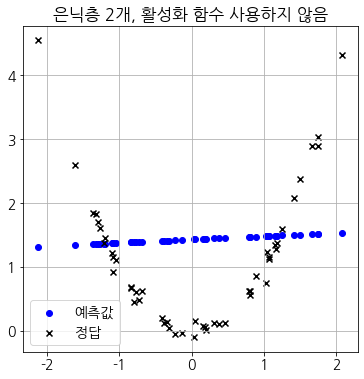

In [ ]:
# 결과 그래프
labels_pred2 = net2(inputs_test)

plt.title('은닉층 2개, 활성화 함수 사용하지 않음')
plt.scatter(inputs_test[:,0].data, labels_pred2[:,0].data, c='b', label='예측값')
plt.scatter(inputs_test[:,0].data, labels_test[:,0].data, c='k', marker='x',label='정답')
plt.legend()
plt.show()


### 딥러닝 모델(활성화 함수 사용)의 경우

In [ ]:
# 모델 정의

class Net3(nn.Module):
    def __init__(self):
        #  부모 클래스 nn.Modules 초기화
        super().__init__()

        # 출력층 정의
        self.l1 = nn.Linear(1, 10)
        self.l2 = nn.Linear(10, 10)
        self.l3 = nn.Linear(10,1)
        self.relu = nn.ReLU(inplace=True)
        
    # 예측 함수 정의
    def forward(self, x):
        x1 = self.relu(self.l1(x))
        x2 = self.relu(self.l2(x1))
        x3 = self.l3(x2)
        return x3

In [ ]:
# 학습률
lr = 0.01

# 인스턴스 생성(파라미터 초기화)
net3 = Net3()

# 최적화 알고리즘 : 경사 하강법
optimizer = optim.SGD(net3.parameters(), lr=lr)

# 손실 함수： 평균 제곱 오차
criterion = nn.MSELoss()

# 반복 횟수
num_epochs = 10000

# history 기록을 위한 배열 초기화(손실 함수 값 만을 기록)
history = np.zeros((0,2))

In [ ]:
# 반복 계산 메인 루프

for epoch in range(num_epochs):
    
    # 경사 값 초기화
    optimizer.zero_grad()

    # 예측 계산
    outputs = net3(inputs)
  
    # 오차 계산
    loss = criterion(outputs, labels)

    # 경사 계산
    loss.backward()

    # 경사 하강법 적용
    optimizer.step()

    # 100회 마다 도중 경과를 기록
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 5.56427
Epoch 100 loss: 0.70976
Epoch 200 loss: 0.13887
Epoch 300 loss: 0.08756
Epoch 400 loss: 0.06449
Epoch 500 loss: 0.05155
Epoch 600 loss: 0.04217
Epoch 700 loss: 0.03455
Epoch 800 loss: 0.02914
Epoch 900 loss: 0.02512
Epoch 1000 loss: 0.02226
Epoch 1100 loss: 0.02009
Epoch 1200 loss: 0.01860
Epoch 1300 loss: 0.01753
Epoch 1400 loss: 0.01673
Epoch 1500 loss: 0.01606
Epoch 1600 loss: 0.01519
Epoch 1700 loss: 0.01452
Epoch 1800 loss: 0.01396
Epoch 1900 loss: 0.01348
Epoch 2000 loss: 0.01307
Epoch 2100 loss: 0.01267
Epoch 2200 loss: 0.01232
Epoch 2300 loss: 0.01202
Epoch 2400 loss: 0.01177
Epoch 2500 loss: 0.01160
Epoch 2600 loss: 0.01146
Epoch 2700 loss: 0.01133
Epoch 2800 loss: 0.01119
Epoch 2900 loss: 0.01107
Epoch 3000 loss: 0.01097
Epoch 3100 loss: 0.01088
Epoch 3200 loss: 0.01081
Epoch 3300 loss: 0.01076
Epoch 3400 loss: 0.01071
Epoch 3500 loss: 0.01066
Epoch 3600 loss: 0.01062
Epoch 3700 loss: 0.01058
Epoch 3800 loss: 0.01055
Epoch 3900 loss: 0.01051
Epoch 4000 l

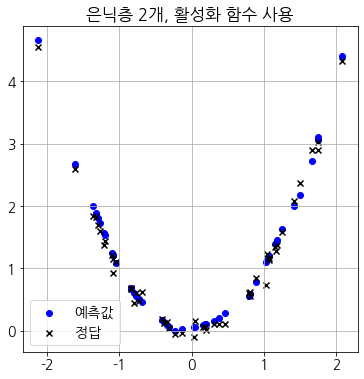

In [ ]:
# 결과 그래프
labels_pred3 = net3(inputs_test)

plt.title('은닉층 2개, 활성화 함수 사용')
plt.scatter(inputs_test[:,0].data, labels_pred3[:,0].data, c='b', label='예측값')
plt.scatter(inputs_test[:,0].data, labels_test[:,0].data, c='k', marker='x',label='정답')
plt.legend()
plt.show()
